In [401]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       2.1.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bi

In [402]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier



In [403]:
from sklearn.preprocessing import LabelEncoder

In [404]:
dataFrame=pd.read_csv("C:\\Users\\hrugv\\OneDrive\\Desktop\\Telco_customer_churn.csv")

In [405]:
dataFrame

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [406]:
df=dataFrame.copy()

In [407]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [408]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [409]:
df['ChurnValue'].value_counts()

0    5174
1    1869
Name: ChurnValue, dtype: int64

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Count             7043 non-null   int64  
 2   Country           7043 non-null   object 
 3   State             7043 non-null   object 
 4   City              7043 non-null   object 
 5   ZipCode           7043 non-null   int64  
 6   LatLong           7043 non-null   object 
 7   Latitude          7043 non-null   float64
 8   Longitude         7043 non-null   float64
 9   Gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   object 
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  TenureMonths      7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  MultipleLines     7043 non-null   object 
 16  InternetService   7043 non-null   object 


In [411]:
df.drop(['Country'],axis=1,inplace=True)

In [412]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [413]:
df['Count'].value_counts()

1    7043
Name: Count, dtype: int64

In [414]:
df.drop(['Count'],axis=1,inplace=True)

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             7043 non-null   object 
 1   City              7043 non-null   object 
 2   ZipCode           7043 non-null   int64  
 3   LatLong           7043 non-null   object 
 4   Latitude          7043 non-null   float64
 5   Longitude         7043 non-null   float64
 6   Gender            7043 non-null   object 
 7   SeniorCitizen     7043 non-null   object 
 8   Partner           7043 non-null   object 
 9   Dependents        7043 non-null   object 
 10  TenureMonths      7043 non-null   int64  
 11  PhoneService      7043 non-null   object 
 12  MultipleLines     7043 non-null   object 
 13  InternetService   7043 non-null   object 
 14  OnlineSecurity    7043 non-null   object 
 15  OnlineBackup      7043 non-null   object 
 16  DeviceProtection  7043 non-null   object 


In [416]:
df['State'].value_counts()

California    7043
Name: State, dtype: int64

In [417]:
df.drop(['State'],inplace=True,axis=1)

In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              7043 non-null   object 
 1   ZipCode           7043 non-null   int64  
 2   LatLong           7043 non-null   object 
 3   Latitude          7043 non-null   float64
 4   Longitude         7043 non-null   float64
 5   Gender            7043 non-null   object 
 6   SeniorCitizen     7043 non-null   object 
 7   Partner           7043 non-null   object 
 8   Dependents        7043 non-null   object 
 9   TenureMonths      7043 non-null   int64  
 10  PhoneService      7043 non-null   object 
 11  MultipleLines     7043 non-null   object 
 12  InternetService   7043 non-null   object 
 13  OnlineSecurity    7043 non-null   object 
 14  OnlineBackup      7043 non-null   object 
 15  DeviceProtection  7043 non-null   object 
 16  TechSupport       7043 non-null   object 


In [419]:
df.drop(['ChurnLabel'],axis=1,inplace=True)

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              7043 non-null   object 
 1   ZipCode           7043 non-null   int64  
 2   LatLong           7043 non-null   object 
 3   Latitude          7043 non-null   float64
 4   Longitude         7043 non-null   float64
 5   Gender            7043 non-null   object 
 6   SeniorCitizen     7043 non-null   object 
 7   Partner           7043 non-null   object 
 8   Dependents        7043 non-null   object 
 9   TenureMonths      7043 non-null   int64  
 10  PhoneService      7043 non-null   object 
 11  MultipleLines     7043 non-null   object 
 12  InternetService   7043 non-null   object 
 13  OnlineSecurity    7043 non-null   object 
 14  OnlineBackup      7043 non-null   object 
 15  DeviceProtection  7043 non-null   object 
 16  TechSupport       7043 non-null   object 


In [421]:
df.drop(['ChurnReason'],inplace=True,axis=1)

In [422]:
df.drop(['LatLong'],inplace=True,axis=1)

In [423]:
df['ChurnScore'].unique()

array([ 86,  67,  84,  89,  78, 100,  92,  77,  97,  74,  66,  65,  70,
        90,  82,  69,  81,  96,  87,  88,  75,  76,  95,  99,  80,  73,
        94,  83,  98,  71,  85,  68,  91,  93,  72,  79,  27,  61,  43,
        51,  58,  39,  35,  57,  53,  21,  38,  40,  41,  22,  25,  64,
        49,  62,  52,  59,  29,  33,  20,  30,  26,  54,  56,  55,  28,
        37,   9,  60,  24,  63,  23,  47,  32,   8,  46,  42,  48,  36,
        34,   7,  50,  44,  31,   5,  45], dtype=int64)

In [424]:
print(df['ChurnScore'].max())
print(df['ChurnScore'].min())

100
5


In [425]:
df['ChurnScore'].value_counts()

80    151
71    148
77    145
67    143
76    141
     ... 
88     33
9       3
8       2
7       2
5       1
Name: ChurnScore, Length: 85, dtype: int64

In [426]:
correlation_matrix = df[['ChurnScore', 'ChurnValue']].corr()
print(correlation_matrix)

            ChurnScore  ChurnValue
ChurnScore    1.000000    0.664897
ChurnValue    0.664897    1.000000


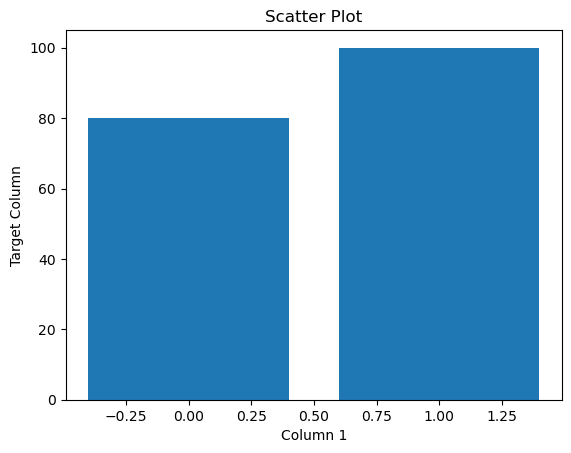

In [427]:
plt.bar(df['ChurnValue'],df['ChurnScore'] )
plt.xlabel('Column 1')
plt.ylabel('Target Column')
plt.title('Scatter Plot')
plt.show()

array([[<AxesSubplot:title={'center':'ZipCode'}>,
        <AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>],
       [<AxesSubplot:title={'center':'TenureMonths'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'ChurnValue'}>],
       [<AxesSubplot:title={'center':'ChurnScore'}>,
        <AxesSubplot:title={'center':'CLTV'}>, <AxesSubplot:>]],
      dtype=object)

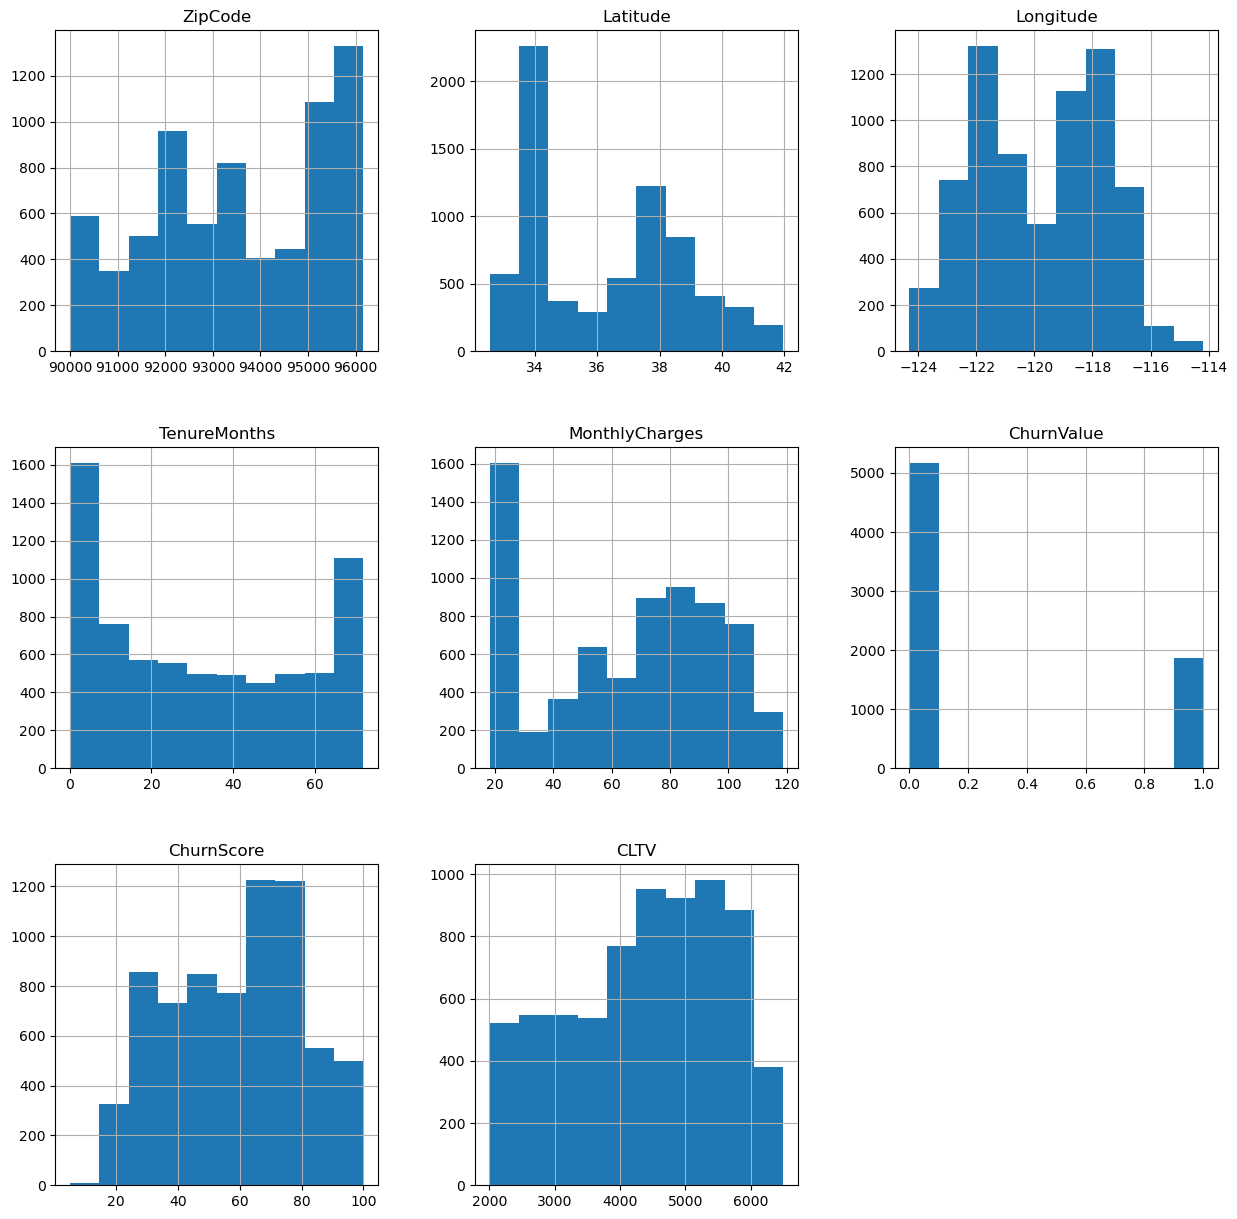

In [428]:
df.hist(figsize=(15,15))

In [429]:
df["Latitude"].unique()

array([33.964131, 34.059281, 34.048013, ..., 40.346634, 41.813521,
       39.191797])

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              7043 non-null   object 
 1   ZipCode           7043 non-null   int64  
 2   Latitude          7043 non-null   float64
 3   Longitude         7043 non-null   float64
 4   Gender            7043 non-null   object 
 5   SeniorCitizen     7043 non-null   object 
 6   Partner           7043 non-null   object 
 7   Dependents        7043 non-null   object 
 8   TenureMonths      7043 non-null   int64  
 9   PhoneService      7043 non-null   object 
 10  MultipleLines     7043 non-null   object 
 11  InternetService   7043 non-null   object 
 12  OnlineSecurity    7043 non-null   object 
 13  OnlineBackup      7043 non-null   object 
 14  DeviceProtection  7043 non-null   object 
 15  TechSupport       7043 non-null   object 
 16  StreamingTV       7043 non-null   object 


In [431]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})


In [432]:
le = LabelEncoder()

# Fit the encoder to the categorical column
le.fit(df['City'])

# Transform the categorical column
df['City'] = le.transform(df['City'])

In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              7043 non-null   int32  
 1   ZipCode           7043 non-null   int64  
 2   Latitude          7043 non-null   float64
 3   Longitude         7043 non-null   float64
 4   Gender            7043 non-null   int64  
 5   SeniorCitizen     7043 non-null   object 
 6   Partner           7043 non-null   object 
 7   Dependents        7043 non-null   object 
 8   TenureMonths      7043 non-null   int64  
 9   PhoneService      7043 non-null   object 
 10  MultipleLines     7043 non-null   object 
 11  InternetService   7043 non-null   object 
 12  OnlineSecurity    7043 non-null   object 
 13  OnlineBackup      7043 non-null   object 
 14  DeviceProtection  7043 non-null   object 
 15  TechSupport       7043 non-null   object 
 16  StreamingTV       7043 non-null   object 


In [434]:
df['Dependents'].value_counts()

No     5416
Yes    1627
Name: Dependents, dtype: int64

In [435]:
df['Dependents']=df['Dependents'].map({'No':0,'Yes':1})

In [436]:
df.drop(['CLTV'],axis=1,inplace=True)

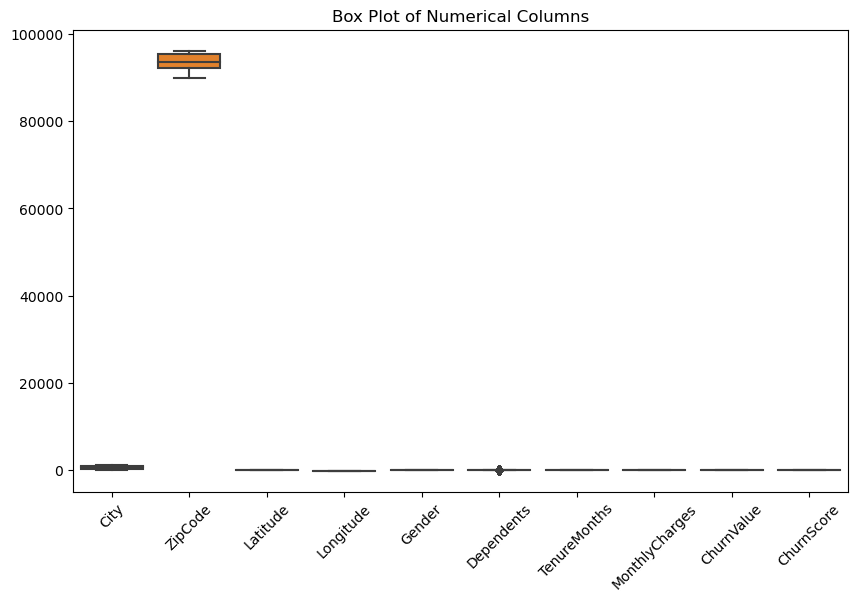

In [437]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Box Plot of Numerical Columns')
plt.show()


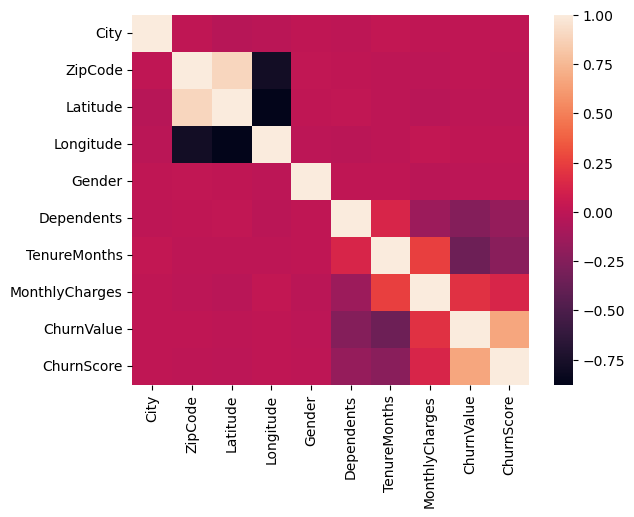

In [438]:
mapp=sns.heatmap(df.corr())

In [439]:
df['SeniorCitizen']=df['SeniorCitizen'].map({'No':0,'Yes':1})

In [440]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [441]:
df['Partner']=df['Partner'].map({'No':0,'Yes':1})

In [442]:
df['Partner'].value_counts()

0    3641
1    3402
Name: Partner, dtype: int64

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              7043 non-null   int32  
 1   ZipCode           7043 non-null   int64  
 2   Latitude          7043 non-null   float64
 3   Longitude         7043 non-null   float64
 4   Gender            7043 non-null   int64  
 5   SeniorCitizen     7043 non-null   int64  
 6   Partner           7043 non-null   int64  
 7   Dependents        7043 non-null   int64  
 8   TenureMonths      7043 non-null   int64  
 9   PhoneService      7043 non-null   object 
 10  MultipleLines     7043 non-null   object 
 11  InternetService   7043 non-null   object 
 12  OnlineSecurity    7043 non-null   object 
 13  OnlineBackup      7043 non-null   object 
 14  DeviceProtection  7043 non-null   object 
 15  TechSupport       7043 non-null   object 
 16  StreamingTV       7043 non-null   object 


In [444]:
df['PaperlessBilling']=df['PaperlessBilling'].map({'No':0,'Yes':1})

In [445]:
df['PhoneService']=df['PhoneService'].map({'No':0,'Yes':1})

In [446]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [447]:
le.fit(df['OnlineSecurity'])

df['OnlineSecurity'] = le.transform(df['OnlineSecurity'])

In [448]:
 #13  OnlineBackup      7043 non-null   object 
 # 14  DeviceProtection  7043 non-null   object 
 #15  TechSupport       7043 non-null   object 
 #16  StreamingTV       7043 non-null   object 
 #17  Streaming Movies  7043 non-null   object 
 #18  Contract          7043 non-null   object

In [449]:
le.fit(df['OnlineBackup'])

df['OnlineBackup'] = le.transform(df['OnlineBackup'])

In [450]:
le.fit(df['DeviceProtection'])

df['DeviceProtection'] = le.transform(df['DeviceProtection'])

In [451]:
le.fit(df['TechSupport'])

df['TechSupport'] = le.transform(df['TechSupport'])

In [452]:
le.fit(df['StreamingTV'])

df['StreamingTV'] = le.transform(df['StreamingTV'])

In [453]:
le.fit(df['Streaming Movies'])

df['Streaming Movies'] = le.transform(df['Streaming Movies'])

In [454]:
le.fit(df['Contract'])

df['Contract'] = le.transform(df['Contract'])

In [455]:
print(df['OnlineBackup'].value_counts())
print(df['DeviceProtection'].value_counts())
print(df['TechSupport'].value_counts())
print(df['StreamingTV'].value_counts())
print(df['Streaming Movies'].value_counts())
print(df['Contract'].value_counts())


0    3088
2    2429
1    1526
Name: OnlineBackup, dtype: int64
0    3095
2    2422
1    1526
Name: DeviceProtection, dtype: int64
0    3473
2    2044
1    1526
Name: TechSupport, dtype: int64
0    2810
2    2707
1    1526
Name: StreamingTV, dtype: int64
0    2785
2    2732
1    1526
Name: Streaming Movies, dtype: int64
0    3875
2    1695
1    1473
Name: Contract, dtype: int64


In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              7043 non-null   int32  
 1   ZipCode           7043 non-null   int64  
 2   Latitude          7043 non-null   float64
 3   Longitude         7043 non-null   float64
 4   Gender            7043 non-null   int64  
 5   SeniorCitizen     7043 non-null   int64  
 6   Partner           7043 non-null   int64  
 7   Dependents        7043 non-null   int64  
 8   TenureMonths      7043 non-null   int64  
 9   PhoneService      7043 non-null   int64  
 10  MultipleLines     7043 non-null   object 
 11  InternetService   7043 non-null   object 
 12  OnlineSecurity    7043 non-null   int32  
 13  OnlineBackup      7043 non-null   int32  
 14  DeviceProtection  7043 non-null   int32  
 15  TechSupport       7043 non-null   int32  
 16  StreamingTV       7043 non-null   int32  


In [458]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].astype('Int64'))

ValueError: invalid literal for int() with base 10: '108.15'

In [459]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype('float64')


In [460]:
df['TotalCharges']

0        108.15
1        151.65
2        820.50
3       3046.05
4       5036.30
         ...   
7038    1419.40
7039    1990.50
7040    7362.90
7041     346.45
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              7043 non-null   int32  
 1   ZipCode           7043 non-null   int64  
 2   Latitude          7043 non-null   float64
 3   Longitude         7043 non-null   float64
 4   Gender            7043 non-null   int64  
 5   SeniorCitizen     7043 non-null   int64  
 6   Partner           7043 non-null   int64  
 7   Dependents        7043 non-null   int64  
 8   TenureMonths      7043 non-null   int64  
 9   PhoneService      7043 non-null   int64  
 10  MultipleLines     7043 non-null   object 
 11  InternetService   7043 non-null   object 
 12  OnlineSecurity    7043 non-null   int32  
 13  OnlineBackup      7043 non-null   int32  
 14  DeviceProtection  7043 non-null   int32  
 15  TechSupport       7043 non-null   int32  
 16  StreamingTV       7043 non-null   int32  


In [462]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [463]:
le.fit(df['PaymentMethod'])

df['PaymentMethod'] = le.transform(df['PaymentMethod'])

In [464]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [465]:
le.fit(['MultipleLines'])
df['MultipleLines']=le.transform(df['MultipleLines'])

ValueError: y contains previously unseen labels: 'No'

In [ ]:
df['MultipleLines'].unique()

In [466]:
df['MultipleLines']=df['MultipleLines'].map({'No':0,'Yes':1,'No phone service':2})

In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              7043 non-null   int32  
 1   ZipCode           7043 non-null   int64  
 2   Latitude          7043 non-null   float64
 3   Longitude         7043 non-null   float64
 4   Gender            7043 non-null   int64  
 5   SeniorCitizen     7043 non-null   int64  
 6   Partner           7043 non-null   int64  
 7   Dependents        7043 non-null   int64  
 8   TenureMonths      7043 non-null   int64  
 9   PhoneService      7043 non-null   int64  
 10  MultipleLines     7043 non-null   int64  
 11  InternetService   7043 non-null   object 
 12  OnlineSecurity    7043 non-null   int32  
 13  OnlineBackup      7043 non-null   int32  
 14  DeviceProtection  7043 non-null   int32  
 15  TechSupport       7043 non-null   int32  
 16  StreamingTV       7043 non-null   int32  


In [468]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [469]:
df['InternetService']=df['InternetService'].map({'DSL':0,'Fiber optic':1,'No':2})

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              7043 non-null   int32  
 1   ZipCode           7043 non-null   int64  
 2   Latitude          7043 non-null   float64
 3   Longitude         7043 non-null   float64
 4   Gender            7043 non-null   int64  
 5   SeniorCitizen     7043 non-null   int64  
 6   Partner           7043 non-null   int64  
 7   Dependents        7043 non-null   int64  
 8   TenureMonths      7043 non-null   int64  
 9   PhoneService      7043 non-null   int64  
 10  MultipleLines     7043 non-null   int64  
 11  InternetService   7043 non-null   int64  
 12  OnlineSecurity    7043 non-null   int32  
 13  OnlineBackup      7043 non-null   int32  
 14  DeviceProtection  7043 non-null   int32  
 15  TechSupport       7043 non-null   int32  
 16  StreamingTV       7043 non-null   int32  


In [489]:
y=df['ChurnValue']
X=df.drop(['ChurnValue'],axis=1)
X_train , X_test ,y_train,y_test=train_test_split(X,y,test_size=.35,random_state=0)
rfc=RandomForestClassifier(n_estimators=10,random_state=0)

rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)
accu=accuracy_score(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)
print(f"Accuracy:{accu:.2f}")
print("\nthe classification report:\n",classification_rep)

Accuracy:0.92

the classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1806
           1       0.91      0.79      0.84       660

    accuracy                           0.92      2466
   macro avg       0.92      0.88      0.90      2466
weighted avg       0.92      0.92      0.92      2466



In [472]:
df['Latitude'] = df['Latitude'].astype('float32')


In [473]:
df['Longitude'] = df['Longitude'].astype('float32')


In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              7043 non-null   int32  
 1   ZipCode           7043 non-null   int64  
 2   Latitude          7043 non-null   float32
 3   Longitude         7043 non-null   float32
 4   Gender            7043 non-null   int64  
 5   SeniorCitizen     7043 non-null   int64  
 6   Partner           7043 non-null   int64  
 7   Dependents        7043 non-null   int64  
 8   TenureMonths      7043 non-null   int64  
 9   PhoneService      7043 non-null   int64  
 10  MultipleLines     7043 non-null   int64  
 11  InternetService   7043 non-null   int64  
 12  OnlineSecurity    7043 non-null   int32  
 13  OnlineBackup      7043 non-null   int32  
 14  DeviceProtection  7043 non-null   int32  
 15  TechSupport       7043 non-null   int32  
 16  StreamingTV       7043 non-null   int32  


In [477]:
df['MonthlyCharges'] = df['MonthlyCharges'].astype('float32')

In [482]:
df['TotalCharges'] = df['TotalCharges'].astype('float32')

In [ ]:
df.isnull().sum()

In [ ]:
df['TotalCharges'].isnull().sum()

In [480]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [ ]:
#using smote to balance the data

In [491]:
df1=df.copy()

In [492]:
df2=df.copy()

In [493]:
from imblearn.over_sampling import SMOTE
import pandas as pd

smote = SMOTE(sampling_strategy={1: 3000}, random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())


0    5174
1    3000
Name: ChurnValue, dtype: int64


In [494]:
# Instantiate RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the resampled data
rf_classifier.fit(X_resampled, y_resampled)

# Assuming X_test and y_test are your test features and target
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1806
           1       1.00      1.00      1.00       660

    accuracy                           1.00      2466
   macro avg       1.00      1.00      1.00      2466
weighted avg       1.00      1.00      1.00      2466

Confusion Matrix:
[[1806    0]
 [   0  660]]


In [ ]:
df1.info()

In [498]:
df1.drop(['ChurnScore'],axis=1,inplace=True)

In [503]:
from imblearn.over_sampling import SMOTE
import pandas as pd

X = df1.drop('ChurnValue', axis=1)  
y = df1['ChurnValue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)



smote = SMOTE(sampling_strategy={1: 1869*2}, random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)



# Combine X_resampled and y_resampled back into df2
df2_resampled = pd.concat([X_resampled_df, y_resampled], axis=1)

# Display new class counts
print(df2_resampled['ChurnValue'].value_counts())


0    5174
1    3738
Name: ChurnValue, dtype: int64


In [504]:
rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_resampled, y_resampled)

y_pred = rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred))


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2562
           1       1.00      1.00      1.00       960

    accuracy                           1.00      3522
   macro avg       1.00      1.00      1.00      3522
weighted avg       1.00      1.00      1.00      3522

Confusion Matrix:
[[2561    1]
 [   0  960]]


In [509]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              7043 non-null   int32  
 1   ZipCode           7043 non-null   int64  
 2   Latitude          7043 non-null   float32
 3   Longitude         7043 non-null   float32
 4   Gender            7043 non-null   int64  
 5   SeniorCitizen     7043 non-null   int64  
 6   Partner           7043 non-null   int64  
 7   Dependents        7043 non-null   int64  
 8   TenureMonths      7043 non-null   int64  
 9   PhoneService      7043 non-null   int64  
 10  MultipleLines     7043 non-null   int64  
 11  InternetService   7043 non-null   int64  
 12  OnlineSecurity    7043 non-null   int32  
 13  OnlineBackup      7043 non-null   int32  
 14  DeviceProtection  7043 non-null   int32  
 15  TechSupport       7043 non-null   int32  
 16  StreamingTV       7043 non-null   int32  


In [505]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


X = df2.drop('ChurnValue', axis=1)
y = df2['ChurnValue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)


brf = BalancedRandomForestClassifier(random_state=42)

brf.fit(X_train, y_train)

y_pred = brf.predict(X_test)
accu=accuracy_score(y_test,y_pred)
print("Accuracy:")
print(accu)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


C:\Users\hrugv\AppData\Roaming\Python\Python39\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\hrugv\AppData\Roaming\Python\Python39\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\hrugv\AppData\Roaming\Python\Python39\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning 

Accuracy:
0.9111922141119222
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1789
           1       0.78      0.94      0.85       677

    accuracy                           0.91      2466
   macro avg       0.88      0.92      0.89      2466
weighted avg       0.92      0.91      0.91      2466

Confusion Matrix:
[[1610  179]
 [  40  637]]


In [ ]:
df2.info()

In [510]:
df3=df.copy()

In [512]:
df3.drop(['ChurnScore'],axis=1,inplace=True)

In [516]:
y=df['ChurnValue']
X=df.drop(['ChurnValue'],axis=1)
X_train , X_test ,y_train,y_test=train_test_split(X,y,test_size=.35,random_state=0)
rfc=RandomForestClassifier(n_estimators=10,random_state=0)

rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)
accu=accuracy_score(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)
print(f"Accuracy:{accu:.2f}")
print("\nthe classification report:\n",classification_rep)

Accuracy:0.92

the classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1806
           1       0.91      0.79      0.84       660

    accuracy                           0.92      2466
   macro avg       0.92      0.88      0.90      2466
weighted avg       0.92      0.92      0.92      2466



In [589]:
XX_test=X_test.copy()

In [590]:
XX_test

,City,ZipCode,Latitude,Longitude,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,...,DeviceProtection,TechSupport,StreamingTV,Streaming Movies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnScore
2200,93,92316,34.059723,-117.391037,0,1,0,0,49,1,...,0,0,2,2,0,0,1,101.550003,5070.399902,22
4627,55,92309,35.289520,-116.092216,1,0,0,0,24,1,...,1,1,1,1,1,0,2,24.600000,592.650024,79
3225,371,91203,34.153339,-118.262978,1,0,0,0,1,1,...,0,0,0,0,0,0,2,47.950001,47.950001,35
2828,1088,95488,39.724434,-123.767578,0,1,0,0,20,1,...,0,0,2,0,0,0,0,80.699997,1614.199951,73
3768,872,94111,37.801777,-122.402290,0,0,1,1,13,1,...,1,1,1,1,2,1,0,25.000000,332.500000,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,655,91948,32.830853,-116.444603,0,0,0,0,59,1,...,0,2,0,2,1,0,0,68.699997,4070.949951,29
4109,434,95639,38.375324,-121.507935,1,0,0,0,17,1,...,1,1,1,1,2,0,1,19.450001,369.049988,29
4106,339,95631,39.031876,-120.811142,1,0,0,1,9,1,...,1,1,1,1,0,0,3,20.400000,184.100006,67
2760,544,95334,37.361988,-120.748390,0,0,0,0,12,1,...,0,0,0,0,0,1,2,49.400002,611.650024,70


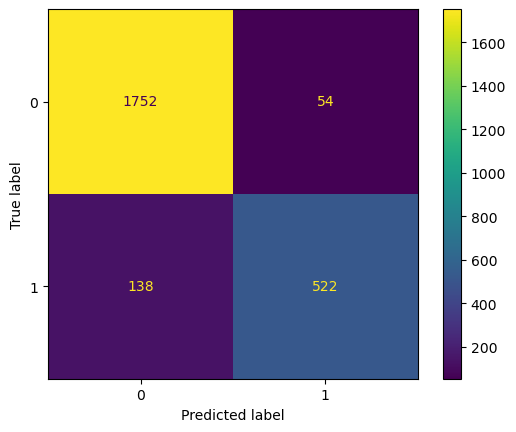

In [519]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show() 

In [574]:
tf.config.list_physical_devices('GPU')

[]

In [521]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              7043 non-null   int32  
 1   ZipCode           7043 non-null   int64  
 2   Latitude          7043 non-null   float32
 3   Longitude         7043 non-null   float32
 4   Gender            7043 non-null   int64  
 5   SeniorCitizen     7043 non-null   int64  
 6   Partner           7043 non-null   int64  
 7   Dependents        7043 non-null   int64  
 8   TenureMonths      7043 non-null   int64  
 9   PhoneService      7043 non-null   int64  
 10  MultipleLines     7043 non-null   int64  
 11  InternetService   7043 non-null   int64  
 12  OnlineSecurity    7043 non-null   int32  
 13  OnlineBackup      7043 non-null   int32  
 14  DeviceProtection  7043 non-null   int32  
 15  TechSupport       7043 non-null   int32  
 16  StreamingTV       7043 non-null   int32  


In [581]:
import pandas as pd

# Example of custom input data
custom_input = pd.DataFrame({
    'City': [562],
    'ZipCode': [90003],
    'Latitude': [33.96413],
    'Longitude': [-118.272781],
    'Gender': [1],
    'SeniorCitizen': [0],
    'Partner': [0],
    'Dependents': [1],
    'TenureMonths': [2],
    'PhoneService': [1],
    'MultipleLines': [1],
    'InternetService': [1],
    'OnlineSecurity': [2],
    'OnlineBackup': [2],
    'DeviceProtection': [0],
    'TechSupport': [1],
    'StreamingTV': [1],
    'Streaming Movies': [0],
    'Contract': [0],
    'PaperlessBilling': [1],
    'PaymentMethod': [3],
    'MonthlyCharges': [53.849998],
    'TotalCharges': [108.150002]
})



In [583]:
custom_input.shape

(1, 23)

In [582]:
y_pred=rfc.predict(custom_input)




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Gender
Feature names seen at fit time, yet now missing:
- ChurnScore
- ChurnValue

  warnings.warn(message, FutureWarning)


ValueError: X has 23 features, but RandomForestClassifier is expecting 24 features as input.

In [579]:
print(y_pred)

[0]


In [ ]:
df3.drop(['ChurnValue'],axis=1,inplace=True)

In [588]:
y=df['ChurnValue']

X=df.drop(['ChurnValue'],axis=1)
X_train , X_test ,y_train,y_test=train_test_split(X,y,test_size=.35,random_state=0)
rfc=RandomForestClassifier(n_estimators=10,random_state=0)

rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)
accu=accuracy_score(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)
print(f"Accuracy:{accu:.2f}")
print("\nthe classification report:\n",classification_rep)

Accuracy:0.92

the classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1806
           1       0.91      0.79      0.84       660

    accuracy                           0.92      2466
   macro avg       0.92      0.88      0.90      2466
weighted avg       0.92      0.92      0.92      2466



In [591]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              7043 non-null   int32  
 1   ZipCode           7043 non-null   int64  
 2   Latitude          7043 non-null   float32
 3   Longitude         7043 non-null   float32
 4   Gender            7043 non-null   int64  
 5   SeniorCitizen     7043 non-null   int64  
 6   Partner           7043 non-null   int64  
 7   Dependents        7043 non-null   int64  
 8   TenureMonths      7043 non-null   int64  
 9   PhoneService      7043 non-null   int64  
 10  MultipleLines     7043 non-null   int64  
 11  InternetService   7043 non-null   int64  
 12  OnlineSecurity    7043 non-null   int32  
 13  OnlineBackup      7043 non-null   int32  
 14  DeviceProtection  7043 non-null   int32  
 15  TechSupport       7043 non-null   int32  
 16  StreamingTV       7043 non-null   int32  


In [592]:
df4=df2.copy()

In [605]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              7043 non-null   int32  
 1   ZipCode           7043 non-null   int64  
 2   Latitude          7043 non-null   float32
 3   Longitude         7043 non-null   float32
 4   Gender            7043 non-null   int64  
 5   SeniorCitizen     7043 non-null   int64  
 6   Partner           7043 non-null   int64  
 7   Dependents        7043 non-null   int64  
 8   TenureMonths      7043 non-null   int64  
 9   PhoneService      7043 non-null   int64  
 10  MultipleLines     7043 non-null   int64  
 11  InternetService   7043 non-null   int64  
 12  OnlineSecurity    7043 non-null   int32  
 13  OnlineBackup      7043 non-null   int32  
 14  DeviceProtection  7043 non-null   int32  
 15  TechSupport       7043 non-null   int32  
 16  StreamingTV       7043 non-null   int32  


In [630]:
df4.drop(['City'],inplace=True,axis=1)

In [631]:
y=df4['ChurnValue']

X=df4.drop(['ChurnValue'],axis=1)
X_train , X_test ,y_train,y_test=train_test_split(X,y,test_size=.35,random_state=0)
rfc=RandomForestClassifier(n_estimators=10,random_state=0)
print(X_test.columns)

Index(['ZipCode', 'Latitude', 'Longitude', 'Gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'TenureMonths', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'Streaming Movies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')


In [632]:
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
accu=accuracy_score(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)
print(f"Accuracy:{accu:.2f}")
print("\nthe classification report:\n",classification_rep)

Accuracy:0.78

the classification report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1806
           1       0.63      0.45      0.52       660

    accuracy                           0.78      2466
   macro avg       0.73      0.68      0.69      2466
weighted avg       0.77      0.78      0.77      2466



In [634]:
X_test.shape

(2466, 22)

In [635]:
df4.shape

(7043, 23)

In [626]:
print(df4.columns)

Index(['City', 'ZipCode', 'Latitude', 'Longitude', 'Gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'TenureMonths', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'Streaming Movies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'ChurnValue'],
      dtype='object')


In [ ]:
df4.drop(['city'])

In [636]:
custom_input = pd.DataFrame({
    'ZipCode': [90003],
    'Latitude': [33.96413],
    'Longitude': [-118.272781],
    'Gender': [1],
    'SeniorCitizen': [0],
    'Partner': [0],
    'Dependents': [1],
    'TenureMonths': [2],
    'PhoneService': [1],
    'MultipleLines': [1],
    'InternetService': [1],
    'OnlineSecurity': [2],
    'OnlineBackup': [2],
    'DeviceProtection': [0],
    'TechSupport': [1],
    'StreamingTV': [1],
    'Streaming Movies': [0],
    'Contract': [0],
    'PaperlessBilling': [1],
    'PaymentMethod': [3],
    'MonthlyCharges': [53.849998],
    'TotalCharges': [108.150002],
})

# Verify the structure of the custom input data
print(custom_input)

   ZipCode  Latitude   Longitude  Gender  SeniorCitizen  Partner  Dependents  \
0    90003  33.96413 -118.272781       1              0        0           1   

   TenureMonths  PhoneService  MultipleLines  ...  OnlineBackup  \
0             2             1              1  ...             2   

   DeviceProtection  TechSupport  StreamingTV  Streaming Movies  Contract  \
0                 0            1            1                 0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              3       53.849998    108.150002  

[1 rows x 22 columns]


In [637]:
custom_input.shape


(1, 22)

In [638]:
y_pred=rfc.predict(custom_input)


In [639]:
print(y_pred)

[0]


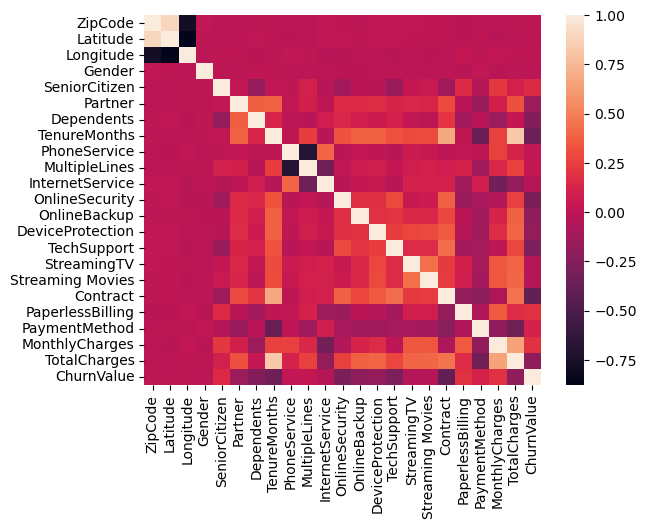

In [640]:
mapp=sns.heatmap(df4.corr())